### Jobs Analyst

#### import necessary library

In [120]:
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1 : merge all sales data into single file csv (Extract and transform data)

###### First Method : using glob package to get all file in directory

In [32]:
data_files = glob.glob('./new_data/*.csv')
all_data = pd.DataFrame()

for file in data_files:
    df=pd.read_csv(file)
    all_data = pd.concat([all_data,df])

all_data.to_csv('./new_data/All_data.csv',index=False)

###### Second Method : using listdir from os package to get all files in directory

In [33]:
data_files = [file for file in os.listdir("./new_data")]

all_data = pd.DataFrame()

for file in data_files:
    df=pd.read_csv("./new_data/"+file)
    all_data = pd.concat([all_data,df])

all_data.to_csv('./new_data/All_data.csv',index=False)

###### Uplaod and read the update data

In [34]:
Jobs_data = pd.read_csv('./new_data/All_data.csv')
Jobs_data.head(5)

,Unnamed: 0,job,location,date,company,country
0,0.0,"Data Engineering Analyst, Data Management","Brampton, ON Sur site",Il y a 3 jours,Loblaw Companies Limited,canada
1,1.0,Loblaw Technology Innovation Intern,"Brampton, ON Sur site",Il y a 5 jours,Loblaw Companies Limited,canada
2,2.0,Analyst - Payments & Services Intern,"Brampton, ON Sur site",Il y a 4 jours,Loblaw Companies Limited,canada
3,3.0,IT Operations Data Analyst Summer Co-op,"Toronto, ON Sur site",Il y a 1 semaine,Loblaw Companies Limited,canada
4,4.0,"Senior Data Analyst, Data Engineering","Brampton, ON Sur site",Il y a 18 heures\r\n\r\n Au cou...,Loblaw Companies Limited,canada


## Task 2 : Clean the dataset

In [35]:
# size of my dataset
Jobs_data = Jobs_data.drop(columns=['Unnamed: 0'])
Jobs_data

,job,location,date,company,country
0,"Data Engineering Analyst, Data Management","Brampton, ON Sur site",Il y a 3 jours,Loblaw Companies Limited,canada
1,Loblaw Technology Innovation Intern,"Brampton, ON Sur site",Il y a 5 jours,Loblaw Companies Limited,canada
2,Analyst - Payments & Services Intern,"Brampton, ON Sur site",Il y a 4 jours,Loblaw Companies Limited,canada
3,IT Operations Data Analyst Summer Co-op,"Toronto, ON Sur site",Il y a 1 semaine,Loblaw Companies Limited,canada
4,"Senior Data Analyst, Data Engineering","Brampton, ON Sur site",Il y a 18 heures\r\n\r\n Au cou...,Loblaw Companies Limited,canada
...,...,...,...,...,...
7579,Lead Electrical Engineer,"Riyad, Arabie saoudite Sur site",Il y a 6 jours,Bechtel Corporation,saudi
7580,Construction Manager (Site Manager),"Riyad, Arabie saoudite Sur site",Il y a 5 jours,Bechtel Corporation,saudi
7581,Product Support Manager,"Riyad, Arabie saoudite Sur site",Il y a 5 jours,Luxury Carts Group,saudi
7582,color Flexo printer operator,"Djeddah, La Mecque, Arabie saoudite Sur site",Il y a 1 mois,Bechtel Corporation,saudi


In [36]:
# Colonnes Types
Jobs_data.dtypes

job         object
location    object
date        object
company     object
country     object
dtype: object

In [48]:
# Convert the data types of certain variables to float
Jobs_data['date'] = Jobs_data['date'].str.replace('Il y a ', '').str.replace(' jours?', ' days').str.replace(' semaine', ' week').str.replace(' hours', ' hours').str.replace('\r\n\r\n Au cou...', ' ')

C:\Users\amine\AppData\Local\Temp\ipykernel_964\3159928912.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Jobs_data['date'] = Jobs_data['date'].str.replace('Il y a ', '').str.replace(' jours?', ' days').str.replace(' semaine', ' week').str.replace(' hours', ' hours').str.replace('\r\n\r\n Au cou...', ' ')


In [50]:
#convert all NaN value to np.na
def convert_to_nan(df):
    n_col = df.shape[1] 
    for index in range(n_col):
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

Sales_data = convert_to_nan(Jobs_data)

<AxesSubplot:title={'center':'Messing values per features'}>

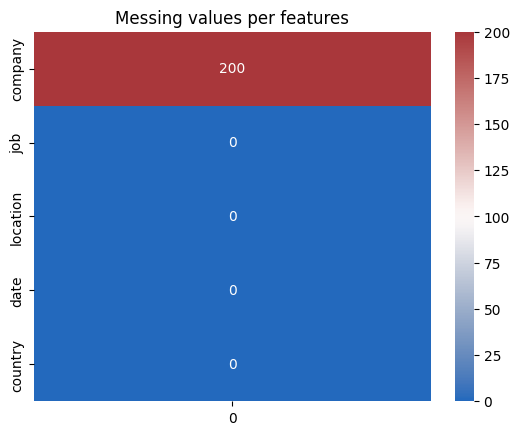

In [51]:
#Check for messing values
plt.title('Messing values per features')
nans = Jobs_data.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

##### Remove all rows where we have all cols are empty (nan)

In [52]:
df_nan = Sales_data[Sales_data['company'].isna()]
df_nan_index = df_nan.index
df_nan

,job,location,date,company,country
361,Lead/Staff Software Engineer – iOS (Bangkok ba...,"Le Caire, Le Caire, Égypte",2 weeks,NaN,egypte
385,Mechanical Maintenance Engineer,"10th of Ramadan, Est, Égypte Sur site",3 weeks,NaN,egypte
386,Lead/Staff Software Engineer – Android (Bangko...,"Le Caire, Le Caire, Égypte",2 weeks,NaN,egypte
410,Business Development Manager,"Le Caire, Égypte Sur site",5 days,NaN,egypte
411,"Senior Ops Specialist/Associate Manager, Partn...","Alexandrie, Alexandrie, Égypte",1 week,NaN,egypte
...,...,...,...,...,...
7531,KVM Virtualization Engineer,"Djeddah, La Mecque, Arabie saoudite Sur site",1 mois,NaN,saudi
7532,Talent Acquisition Manager,"Riyad, Arabie saoudite Sur site",1 days,NaN,saudi
7533,Anesthesia Specialist,Province de Riyad Sur site,1 mois,NaN,saudi
7558,Maintenance Manager - Flexible Packaging - Sau...,"Riyad, Riyad, Arabie saoudite Sur site",1 mois,NaN,saudi


In [53]:
Jobs_data.drop(df_nan_index,axis=0,inplace=True)

<AxesSubplot:title={'center':'Messing Value per feature'}>

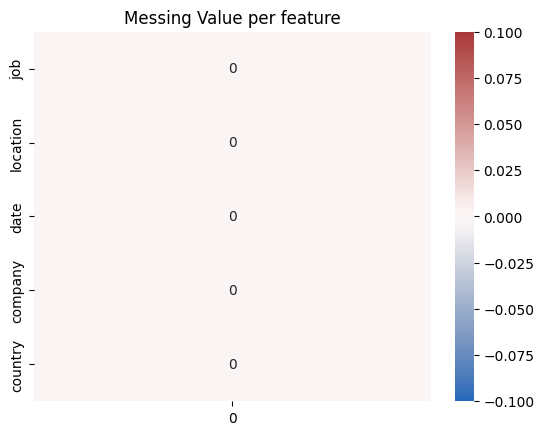

In [54]:
plt.title('Messing Value per feature')
nans = Jobs_data.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [55]:
# Extracting the city and the street from the address
Jobs_data['Street'] = Jobs_data['location'].str.split(",").str[0].str.strip()
Jobs_data['City'] = Jobs_data['location'].str.split(",").str[1].str.strip()

In [68]:
Jobs_data.loc[Jobs_data['country'] == 'Marocco', 'City'] = Jobs_data.loc[Jobs_data['country'] == 'Marocco', 'Street']

## Task 5 : Data Exploration!

#### Question 1 : What are the most frequent job positions in this list?

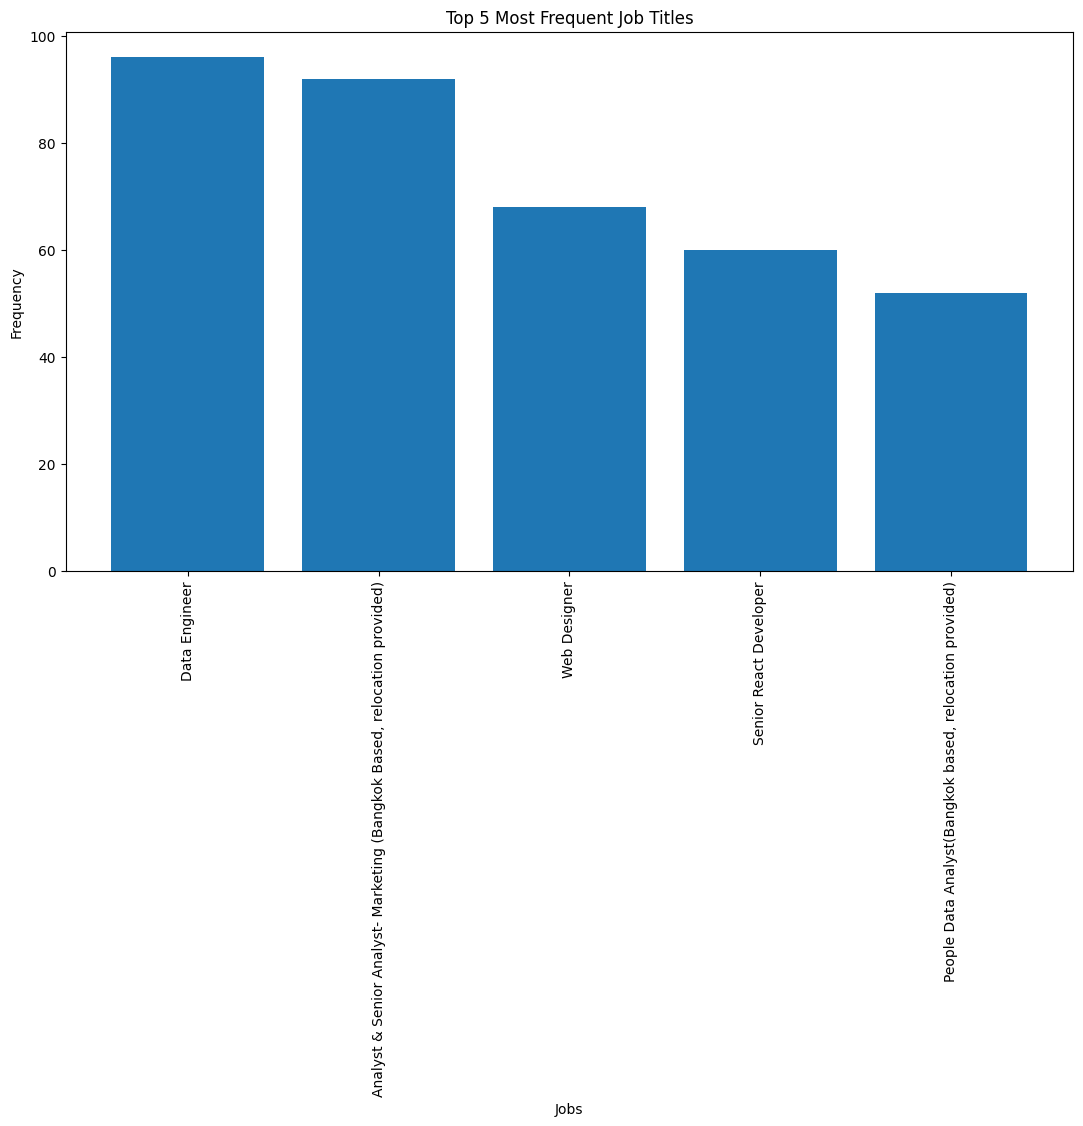

In [86]:
frequent_post = Jobs_data['job'].value_counts().head(5)

plt.figure(figsize=(13,7))
plt.bar(frequent_post.index, frequent_post)
plt.title('Top 5 Most Frequent Job Titles')
plt.xlabel('Jobs')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Question 2 : What are the most common locations for these jobs?

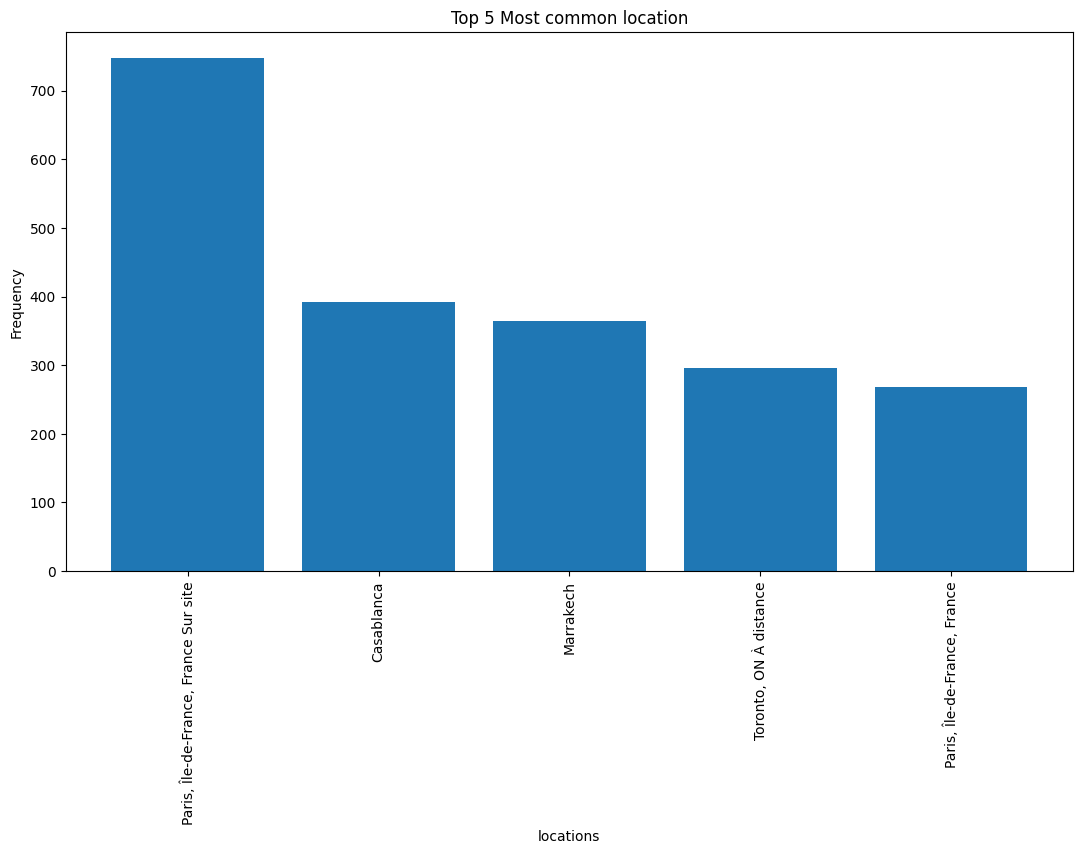

In [101]:
frequent_post = Jobs_data['location'].value_counts().head(5)

plt.figure(figsize=(13,7))
plt.bar(frequent_post.index, frequent_post)
plt.title('Top 5 Most common location')
plt.xlabel('locations')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Question 3 : Which country is most represented in this list?

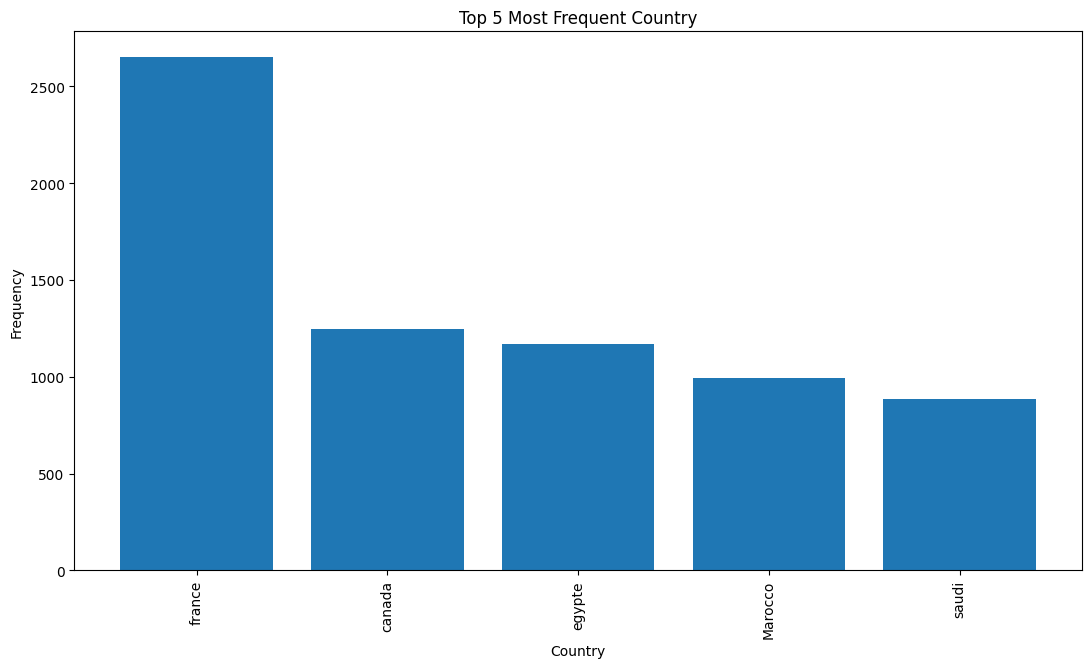

In [102]:
frequent_post = Jobs_data['country'].value_counts().head(5)

plt.figure(figsize=(13,7))
plt.bar(frequent_post.index, frequent_post)
plt.title('Top 5 Most Frequent Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### Question 4 : Which companies offer the most job postings in this list?


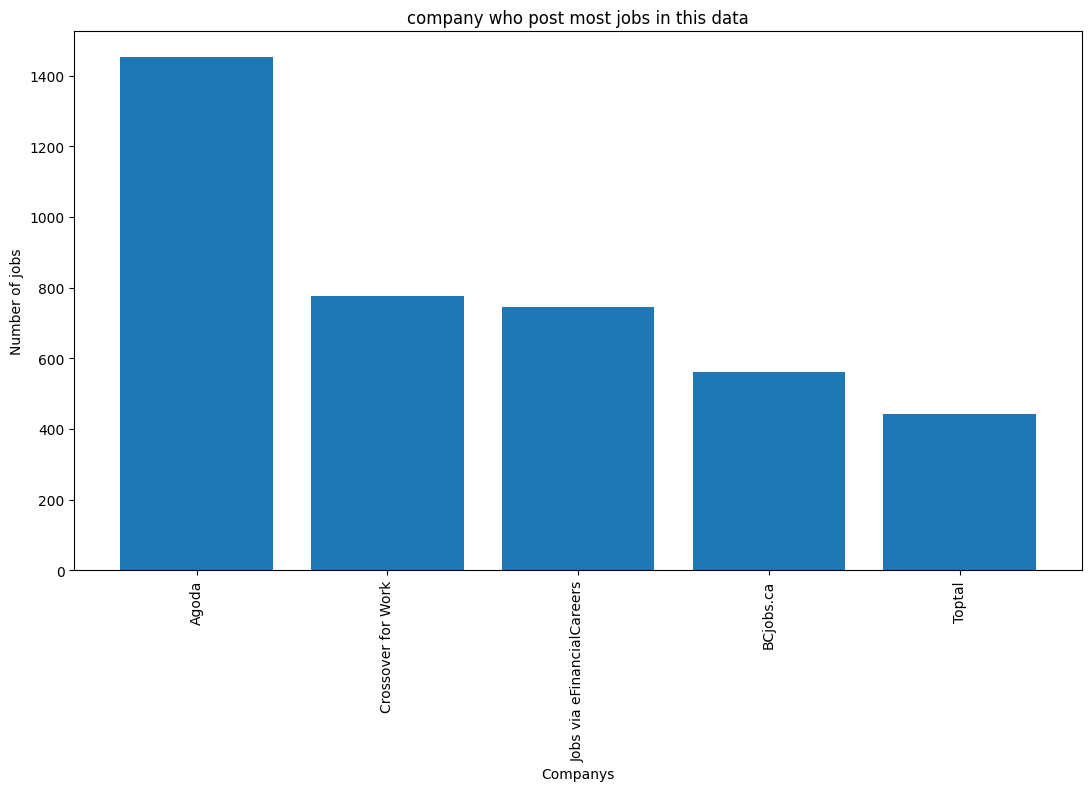

In [98]:
frequent_company = Jobs_data['company'].value_counts().head(5)

plt.figure(figsize=(13,7))
plt.title('company who post most jobs in this data')
plt.bar(frequent_company.index,frequent_company)
plt.xlabel("Companys")
plt.ylabel('Number of jobs')
plt.xticks(rotation=90)
plt.show()

#### Question 5 : Are there specific job postings in certain fields, such as information technology or data analysis?


In [97]:
keywords_technology = ['Loblaw Technology Innovation Intern', 'IT']
keywords_analytics = ['Data Engineering Analyst, Data Management', 'Senior Data Analyst, Data Engineering', 'Data Analyst', 'Data Scientist']


it_jobs = Jobs_data[Jobs_data['job'].str.contains('|'.join(keywords_technology), case=False)]
analytics_jobs = Jobs_data[Jobs_data['job'].str.contains('|'.join(keywords_analytics), case=False)]

print("Number of job postings in Information Technology:", len(it_jobs))
print("Number of job postings in Data Analysis:", len(analytics_jobs))

Number of job postings in Information Technology: 1168
Number of job postings in Data Analysis: 276


### Question 6 : whish the best country how post for Data Analyst job ?

In [119]:
job_country = Jobs_data[Jobs_data['job']=="Data Analyst"].value_counts().to_frame()
job_country

0
job          location                              date   company                    country Street      City            
Data Analyst Montpellier, Occitanie, France        1 mois Teads                      france  Montpellier Occitanie      4
             Paris, Île-de-France, France Sur site 1 mois Jobs via eFinancialCareers france  Paris       Île-de-France  4